In [1]:
import numpy as np
import pandas as pd
import pyspark as ps
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName("sparkSQL exercise") 
        .getOrCreate()
        )
sc = spark.sparkContext

In [2]:
df07 = spark.read.csv('2007/2007_data.csv', header=True, sep=",", inferSchema=True)

In [3]:
df07.createOrReplaceTempView('owners_07')

In [4]:
simple_07 = spark.sql('''
    SELECT FIPST AS state, SECTOR AS sector, 
            IFNULL(ETH1, "N/A") AS ethnicity, 
            IFNULL(RACE1, "U") AS race, 
            IFNULL(SEX1, "U") AS sex, 
            IFNULL(ESTABLISHED, 0) AS year,
            IFNULL(EMPLOYMENT_NOISY, 1) AS employees
    FROM owners_07
    ''')

In [5]:
simple_07.show(41)

+-----+------+---------+----+---+----+---------+
|fipst|sector|ethnicity|race|sex|year|employees|
+-----+------+---------+----+---+----+---------+
|   23|    51|        N|   W|  M|   1|        9|
|   23|    44|        N|   W|  M|   1|       74|
|   23|    55|        N|   W|  M|   1|        2|
|   23|    54|        N|   W|  M|   1|       34|
|   23|    51|        N|   W|  M|   1|      120|
|   23|    42|        N|   W|  M|   1|      110|
|   23|    44|        N|   W|  M|   0|       14|
|   23|    44|        N|   W|  M|   1|       14|
|   23|    44|        N|   W|  M|   1|       34|
|   23|    42|        N|   W|  M|   1|      280|
|   23|    31|        N|   W|  M|   1|       34|
|   23|    31|        N|   W|  M|   1|       10|
|   23|    22|        N|   W|  M|   1|        4|
|   23|    31|        N|   W|  M|   1|       74|
|   23|    54|        N|   W|  M|   1|        0|
|   23|    71|        N|   W|  M|   1|       14|
|   23|    44|        N|   W|  M|   1|       14|
|   23|    31|      

In [6]:
data2007 = simple_07.toPandas()

In [7]:
data2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165680 entries, 0 to 2165679
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   fipst      object
 1   sector     int32 
 2   ethnicity  object
 3   race       object
 4   sex        object
 5   year       object
 6   employees  int32 
dtypes: int32(2), object(5)
memory usage: 99.1+ MB


In [8]:
data2007['year'] = 2007

In [9]:
data2007['year'] = pd.to_numeric(data2007['year'])

In [10]:
data2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165680 entries, 0 to 2165679
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   fipst      object
 1   sector     int32 
 2   ethnicity  object
 3   race       object
 4   sex        object
 5   year       int64 
 6   employees  int32 
dtypes: int32(2), int64(1), object(4)
memory usage: 99.1+ MB


In [48]:
# Leaving state as object because code is alpha-numeric.  Ex. S1, S2, S3, S4.

In [11]:
data2007.sex.unique()

array(['M', 'F'], dtype=object)

In [12]:
data2007['race1'] = data2007['race'].str.slice(stop=1)

In [14]:
data2007['race2'] = data2007['race'].str.slice(start=1)

In [28]:
data2007.race1.unique()

array(['W', 'A', 'I', 'B', 'S', 'P'], dtype=object)

In [197]:
# Race classification is designated by:
# W – WHITE 
# B – BLACK
# I – AIAN (AMERICAN INDIAN AND ALASKA NATIVE)
# A – ASIAN (AN AGGREGATION OF DETAILED ASIAN GROUPS)
# P – NHOPI (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER) 
# S – SOR (SOME OTHER RACE)

In [17]:
data2007.race2.unique()

array(['', '  A', ' I', 'A', 'B', 'I', '    S', '   P', ' A', ' S', 'P',
       '   S', '  P', '  S', ' P', 'S'], dtype=object)

In [26]:
data2007['race2'] = data2007['race2'].str.strip()

In [27]:
data2007.race2.unique()

array(['', 'A', 'I', 'B', 'S', 'P'], dtype=object)

In [31]:
data2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165680 entries, 0 to 2165679
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   fipst      object
 1   sector     int32 
 2   ethnicity  object
 3   race       object
 4   sex        object
 5   year       int64 
 6   employees  int32 
 7   race1      object
 8   race2      object
dtypes: int32(2), int64(1), object(6)
memory usage: 132.2+ MB


In [19]:
data2007.sector.unique()

array([51, 44, 55, 54, 42, 31, 22, 71, 56, 23, 52, 11, 72, 81, 53, 48, 62,
       21, 61, 99], dtype=int32)

In [20]:
def plotdemo(data, col):
    fig, ax = plt.subplots(figsize=(20,5))
    ax.hist(data[col]);

In [21]:
len(data2007[data2007['sector'] == 54])

294882

In [ ]:
# 'pst' stands for Professional, Science, and Technical Services.  Sector 54 is the NAICS code for that industry title.

In [32]:
pst_data_07 = data2007[data2007['sector'] == 54]

In [41]:
pst_data_07.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294882 entries, 3 to 2165665
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   fipst      294882 non-null  object
 1   sector     294882 non-null  int32 
 2   ethnicity  294882 non-null  object
 3   race       294882 non-null  object
 4   sex        294882 non-null  object
 5   year       294882 non-null  int64 
 6   employees  294882 non-null  int32 
 7   race1      294882 non-null  object
 8   race2      294882 non-null  object
dtypes: int32(2), int64(1), object(6)
memory usage: 28.3+ MB


In [102]:
pst_df = pst_data_07.groupby(['race1', 'race2','ethnicity']).agg({'sector':'count'})

In [144]:
pst_percent = pst_df.groupby(level=0).apply(lambda x: 100 * x / float(sum(pst_df['sector'])))
pst_percent.rename(columns={'sector':'percent'},inplace=True)
pst_percent

percent
race1 race2 ethnicity           
A           H           0.094614
            N           6.479880
      P     H           0.002374
            N           0.028825
      S     N           0.044425
B           H           0.162438
            N           4.354623
      A     H           0.005426
            N           0.035607
      I     H           0.004748
            N           0.039677
      P     N           0.002035
      S     H           0.000678
            N           0.007800
I           H           0.074945
            N           0.558868
      A     H           0.001696
            N           0.017295
      P     H           0.000339
            N           0.002035
      S     H           0.000678
            N           0.000678
P           H           0.007461
            N           0.107162
      S     N           0.000678
S           H           0.026112
            N           0.128526
W           H           4.861945
            N          81.641470
      A     H           0.026790
            N           0.454419
      B     H           0.100718
            N           0.219071
      I     H           0.036286
            N           0.343188
      P     H           0.004069
            N           0.048155
      S     H           0.020686
            N           0.053581

In [188]:
percent_race = pst_percent.groupby(level=0).agg({'percent':'sum'})
percent_race.sort_values('percent',ascending=False,inplace=True)
percent_race.reset_index(inplace=True)
percent_race.rename(columns={'race1':'race'},inplace=True)

In [189]:
# percent_race.sort_values('percent',ascending=False,inplace=True)
percent_race

,race,percent
0,W,87.810378
1,A,6.650118
2,B,4.613032
3,I,0.656534
4,S,0.154638
5,P,0.115300


In [190]:
percent_race.sum()

race       WABISP
percent     100.0
dtype: object

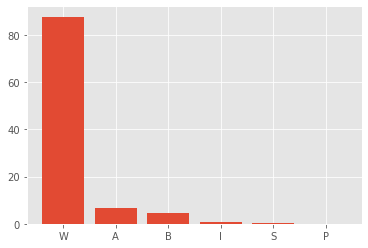

In [193]:
x = np.arange(len(percent_race['race']))

fig, ax = plt.subplots()

ax.bar(x, percent_race['percent'])
ax.set_xticks(x)
ax.set_xticklabels(percent_race['race']);

In [200]:
zoomed_percent_race = percent_race[percent_race['race'] != 'W']
zoomed_percent_race

,race,percent
1,A,6.650118
2,B,4.613032
3,I,0.656534
4,S,0.154638
5,P,0.115300


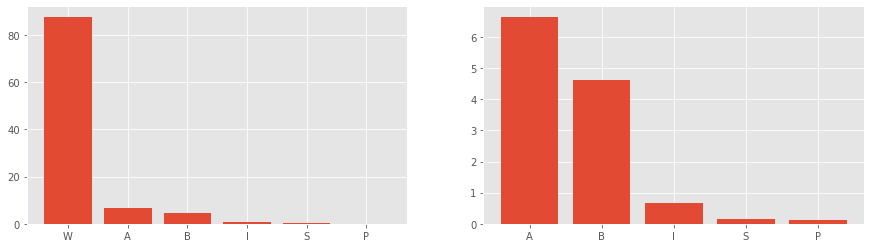

In [204]:
x = np.arange(len(percent_race['race']))
x2 = np.arange(len(zoomed_percent_race['race']))

fig, ax = plt.subplots(1,2,figsize=(15,4))

ax[0].bar(x, percent_race['percent'])
ax[0].set_xticks(x)
ax[0].set_xticklabels(percent_race['race']);

ax[1].bar(x2, zoomed_percent_race['percent'])
ax[1].set_xticks(x2)
ax[1].set_xticklabels(zoomed_percent_race['race']);

In [1]:
zoom_race12 = race12[race12['race'] != 'White']
x = np.arange(len(race12['race']))
x2 = np.arange(len(zoom_race12['race']))
xlist = ['White','Asian','Black', 'Other', 'Native American', 'Pacific']
fig, ax = plt.subplots(2,1,figsize=(5,6))

ax[0].bar(x, race12['percent'], color='deepskyblue')
ax[0].set_xticks(x)
ax[0].set_xticklabels(xlist);

plt.setp(ax[0].get_xticklabels(), rotation=45);

ax[1].bar(x2, zoom_race12['percent'], color='deepskyblue')
ax[1].set_xticks(x2)
ax[1].set_xticklabels(xlist[1:]);

plt.setp(ax[1].get_xticklabels(), rotation=45);

ax[0].set_title("2012 Overall");
ax[1].set_title("2012 Zoomed");
fig.tight_layout()
plt.savefig('2012_racez.png')

NameError: name 'race12' is not defined